In [43]:
import sympy as sp
import numpy as np
g, m , rho, Vb, veq = sp.symbols('g m rho V_b V_eq')

v, vc, y, ym, th, th1, th2, B, p, a, b, e, gamma = sp.symbols('v v_c y y_m theta theta_1 theta_2 B p a b e gamma')
u, uc, zeta, omega = sp.symbols('u u_c zeta omega')

In [24]:
Y_vc = (b*th1)*vc/(p**2-a*p-b*th2)
Ym_vc = B*vc/(p**2+p*B)
error = Y_vc-Ym_vc

vc_Y = (p**2-a*p-b*th2)*y/(b*th1)

In [26]:
e_d_th1 = sp.diff(error, th1).simplify()
e_d_th2 = sp.diff(error, th2).subs(vc, vc_Y).simplify()

In [29]:
th1_p1 = -gamma*e*e_d_th1
th2_p1 = -gamma*e*e_d_th2

In [30]:
th1_p1

-b*e*gamma*v_c/(-a*p - b*theta_2 + p**2)

In [32]:
th2_p1

-b*e*gamma*y/(-a*p - b*theta_2 + p**2)

In [33]:
e_d_th2

b*y/(-a*p - b*theta_2 + p**2)

In [44]:
Y_uc = -b*th*uc/(p**2+b*p-b*th)
Ym_uc = omega*uc/(p**2+zeta*p+omega)

In [47]:
error = Y_uc - Ym_uc
e_d_th = sp.diff(error, th)

In [49]:
e_d_th.simplify()

-b*p*u_c*(b + p)/(b*p - b*theta + p**2)**2

In [71]:
#global variables
OMEGA = 1
ZETA = 1
B = 1 
DT = 1
GAMMA = 1

def MRAS_Control(y_i, y_p1_i, uc_i, u_i, ym_p1_i, ym_i, theta_i, theta_p1_i, theta_p2_i):
    u_o = theta_i*(y_i-uc_i)
    
    ym_p2_o = OMEGA*uc_i - ZETA*ym_p1_i - OMEGA*ym_i
    ym_p1_o = ym_p1_i + DT*ym_p2_o
    ym_o = ym_i + DT*ym_p1_o
    
    y_p2_o = B*u_i - B*y_p1_i
    y_p1_o = y_p1_i + DT*y_p2_o
    y_o = y_i + DT*y_p1_o
    
    error = y_o - ym_o
    
    theta_p3_o = -(GAMMA*error/theta_i)*(B*y_o+y_p1_o) - B*theta_p2_i + B*theta_i*theta_p1_i
    theta_p2_o = theta_p2_i + DT*theta_p3_o
    theta_p1_o = theta_p1_i + DT*theta_p2_o
    theta_o = theta_i + DT*theta_p1_o
    
    result_dict = {"ym_p1": ym_p1_o,
                   "ym": ym_o,
                   "y_p2": y_p2_o,
                   "y_p1": y_p1_o,
                   "y": y_o,
                   "y_p1": y_p1_o,
                   "theta_p3": theta_p3_o,
                   "theta_p2": theta_p2_o,
                   "theta_p1": theta_p1_o,
                   "theta": theta_o
                  }
    return result_dict


In [94]:
#using example from lecture

import matplotlib.pyplot as plt

#params
a = 1
b = 0.5
am = 2
bm = 2

maxt = 300
ts = 0.1
n_steps = int(maxt/ts)

def u_signal(t):
    function_val = np.sin(np.pi*t/15)
    if function_val >= 0:
        result = 1
    else:
        result = -1
    return result

uc = []
for i in range(int(maxt/ts)+1):
  uc.append(u_signal(i*ts))


gamma = 1

theta1_actual = bm/b
theta2_actual = (am-a)/b

theta1_actuals = n_steps*[theta1_actual]
theta2_actuals = n_steps*[theta2_actual]


theta1 = [0.1]
theta2 = [0.1]
theta1_p1 = [0]
theta2_p1 = [0]
theta1_p2 = [0]
theta2_p2 = [0]

y = [0]
ym = [0]
y_p1 = [0]
ym_p1 = [0]
y_p2 = [0]
ym_p2 = [0]

u = []

i = 0
tc= []

def MRAS_Control(theta1_i, theta1_p1_i, theta1_p2_i,
                 theta2_i, theta2_p1_i, theta2_p2_i,
                u_i, uc_i, y_i, y_p1_i,
                ym_i, ym_p1_i):
    u_o = theta1_i*uc_i - theta2_i*y_i
    
    #y
    y_p1_o = -a*y_i + b*u_i
    y_o = y_i + ts*y_p1_o
    
    #ym
    ym_p1_o = -am*ym_i + bm*uc_i
    ym_o = ym_i + ts*ym_p1_o
    
    #error
    error = y_o - ym_o
    
    #theta1
    theta1_p2_o = -am*theta1_p1_i - gamma*am*uc_i*error
    theta1_p1_o = theta1_p1_i + ts*theta1_p2_o
    theta1_o = theta1_i + ts*theta1_p1_o
    
    #theta2
    theta2_p2_o = -am*theta2_p1_i + gamma*am*y_o*error
    theta2_p1_o = theta2_p1_i + ts*theta2_p2_o
    theta2_o = theta2_i + ts*theta2_p1_o
    
    
    result_dict = {"ym_p1": ym_p1_o,
                   "ym": ym_o,
                   "y_p1": y_p1_o,
                   "y": y_o,
                   "y_p1": y_p1_o,
                   "theta1_p2": theta1_p2_o,
                   "theta1_p1": theta1_p1_o,
                   "theta1": theta1_o,
                   "theta2_p2": theta2_p2_o,
                   "theta2_p1": theta2_p1_o,
                   "theta2": theta2_o,
                   "u":u_o,
                  }
    return result_dict

theta1_i = 0.1
theta1_p1_i = 0
theta1_p2_i = 0
        
theta2_i  = 0.1
theta2_p1_i = 0
theta2_p2_i = 0
u_i = 0
uc_i = uc[0]
y_i = 0
y_p1_i = 0
ym_i = 0
ym_p1_i = 0

y_list = []
ym_list = []
u_list = []
tc= []
for k in range(n_steps):
    MRAS_values = MRAS_Control(theta1_i, theta1_p1_i, theta1_p2_i,
                 theta2_i, theta2_p1_i, theta2_p2_i,
                u_i, uc_i, y_i, y_p1_i,
                ym_i, ym_p1_i)
    
    theta1_i = MRAS_values["theta1"]
    theta1_p1_i = MRAS_values["theta1_p1"]
    theta1_p2_i = MRAS_values["theta1_p2"]
        
    theta2_i  = MRAS_values["theta2"]
    theta2_p1_i = MRAS_values["theta2_p1"]
    theta2_p2_i = MRAS_values["theta2_p2"]
    u_i = MRAS_values["u"]
    uc_i = uc[k]
    y_i = MRAS_values["y"]
    y_p1_i = MRAS_values["y_p1"]
    ym_i = MRAS_values["ym"]
    ym_p1_i = MRAS_values["ym_p1"]
    
    y_list.append(y_i)
    u_list.append(u_i)
    ym_list.append(ym_i)
    
    tc.append(i)
    i = i+1
    
start_idx = 0
end_idx = int(maxt/ts)

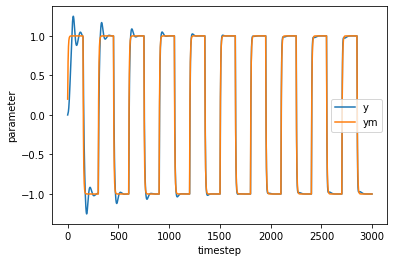

In [96]:
#plt.step(tc[start_idx:end_idx], u_list[start_idx:end_idx], label = "input signal")
plt.plot(tc[start_idx:end_idx], y_list[start_idx:end_idx], label = "y")
plt.plot(tc[start_idx:end_idx], ym_list[start_idx:end_idx], label = "ym")

plt.xlabel("timestep")
plt.ylabel("parameter")
plt.legend()